In [1]:
pip install pysurvival

Note: you may need to restart the kernel to use updated packages.


In [1]:
%%bash
tar cvfz hw.tar.gz .

./
./rfsrc.ipynb
./R/
./R/randomForestSRC/
./R/randomForestSRC/INDEX
./R/randomForestSRC/DESCRIPTION
./R/randomForestSRC/R/
./R/randomForestSRC/R/randomForestSRC.rdx
./R/randomForestSRC/R/randomForestSRC
./R/randomForestSRC/R/randomForestSRC.rdb
./R/randomForestSRC/libs/
./R/randomForestSRC/libs/randomForestSRC.so
./R/randomForestSRC/data/
./R/randomForestSRC/data/wihs.rda
./R/randomForestSRC/data/wine.rda
./R/randomForestSRC/data/housing.rda
./R/randomForestSRC/data/veteran.rda
./R/randomForestSRC/data/pbc.rda
./R/randomForestSRC/data/breast.rda
./R/randomForestSRC/data/follic.rda
./R/randomForestSRC/data/hd.rda
./R/randomForestSRC/data/nutrigenomic.rda
./R/randomForestSRC/data/vdv.rda
./R/randomForestSRC/help/
./R/randomForestSRC/help/randomForestSRC.rdx
./R/randomForestSRC/help/randomForestSRC.rdb
./R/randomForestSRC/help/aliases.rds
./R/randomForestSRC/help/paths.rds
./R/randomForestSRC/help/AnIndex
./R/randomForestSRC/html/
./R/randomForestSRC/html/R.css
./R/randomForestSRC/html/0

tar: ./hw.tar.gz: file changed as we read it


CalledProcessError: Command 'b'tar cvfz hw.tar.gz .\n'' returned non-zero exit status 1.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pysurvival.datasets import Dataset

from sklearn.model_selection import train_test_split
from pysurvival.models.survival_forest import ConditionalSurvivalForestModel
from pysurvival.utils.metrics import concordance_index

from sklearn.model_selection import StratifiedKFold
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import compare_to_actual
from pysurvival.utils.display import integrated_brier_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Reading the dataset
radio_survival_read = pd.read_excel('survival_radiodf.xlsx')
dataset = pd.DataFrame(radio_survival_read)

print(dataset.shape)
dataset

(117, 257)


,GLCM1,GLCM2,GLCM3,GLCM4,GLCM5,GLCM6,GLCM7,GLCM8,GLCM9,GLCM10,...,ACM2_12,ACM2_13,ACM2_14,ACM2_15,ACM2_16,ACM2_17,ACM2_18,ACM2_19,futime,fustatus
0,0.030870,3.001331,0.604866,3.866741,0.500921,18.258242,12.465632,3.790832,5.529970,1.284957,...,-0.042827,0.525955,0.291637,32.527950,1427.462263,22318.653847,6.280324,0.993571,60.945810,0
1,0.021078,5.194088,0.401739,4.385497,0.403100,18.865741,12.347901,3.818701,5.957729,2.000372,...,-0.040352,0.513863,0.216954,33.631275,1120.663393,16894.224710,6.820830,0.994409,90.778045,0
2,0.035745,2.814317,0.527522,3.124458,0.508591,18.975540,9.683516,3.604827,5.341930,1.196185,...,-0.028248,0.437462,0.226980,35.199570,1062.028244,16366.986132,6.750981,0.994563,17.774492,1
3,0.016925,6.939005,0.502221,6.950767,0.381826,14.552118,20.864062,4.161078,6.394160,2.833681,...,-0.088314,0.701940,0.405444,36.164748,913.637308,13320.581899,5.767093,0.992086,138.056223,0
4,0.020551,5.176402,0.503843,5.502904,0.410186,15.769968,16.835213,3.989044,6.095617,2.052897,...,-0.041818,0.517956,0.254018,34.999567,1049.602618,15866.350102,6.409319,0.994022,37.421713,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.038434,3.080864,0.481521,3.063942,0.509267,20.531043,9.174903,3.527590,5.255443,1.395708,...,-0.039312,0.511545,0.247740,31.187236,909.684382,13339.852843,6.592328,0.994103,13.240518,0
113,0.052258,1.450499,0.761002,3.233007,0.627444,17.248041,11.481531,3.688671,4.905295,0.701477,...,-0.071683,0.643484,0.409104,32.563921,1041.097140,16247.377389,6.321337,0.993475,15.408941,0
114,0.052259,1.850561,0.637931,2.718180,0.579336,18.424212,9.022157,3.502254,4.926469,0.843277,...,-0.036121,0.483745,0.272754,34.225167,863.446236,13208.086850,6.544112,0.994254,11.729194,0
115,0.083544,1.570262,0.390610,1.351233,0.608609,13.438211,3.834671,2.860822,4.144431,0.747147,...,-0.035848,0.488470,0.258839,29.922108,1024.451898,15101.508656,6.587295,0.994037,12.024888,0


In [4]:
# Creating the time and event columns
time_column = 'futime'
event_column = 'fustatus'

# Extracting the features
features = np.setdiff1d(dataset.columns, [time_column, event_column] ).tolist()

## Model-1. rfsrc on whole dataset
### c-index: 0.5-0.6

testing C-index: 0.86
testing C-index: 0.57
validation C-index: 0.56


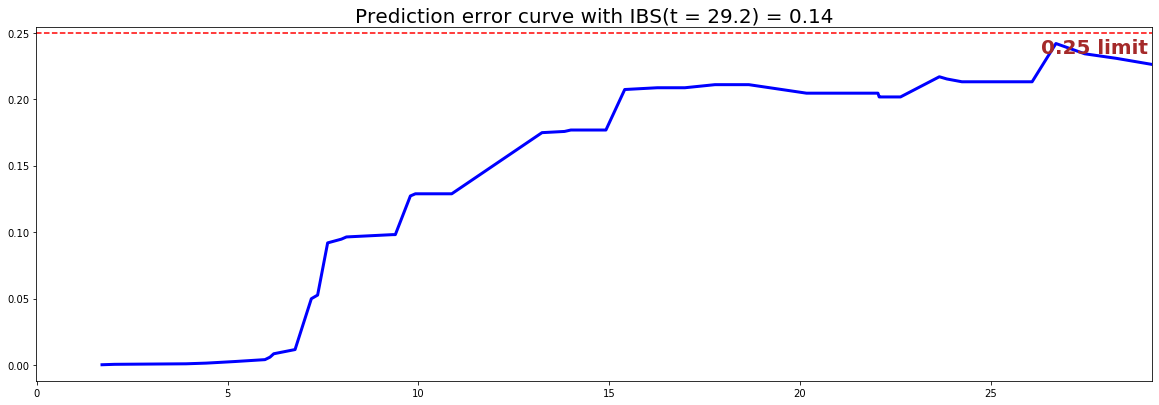

IBS: 0.14


In [34]:
df_dev, dataset_test = train_test_split(dataset, test_size = 0.2)
dataset_train, dataset_val = train_test_split(df_dev, test_size = 0.25)

# N = dataset.shape[0]
# index_train, index_val = train_test_split( range(N), test_size = 0.3)
# index_train, index_test = train_test_split(len(index_train),test_size = 0.3)
# dataset_train = dataset.loc[index_train].reset_index( drop = True )
# dataset_test  = dataset.loc[index_test].reset_index( drop = True )
# dataset_val = dataset.loc[index_val].reset_index( drop = True )

# Creating the X, T and E inputs
X_trainds, X_testds, X_valds = dataset_train[features], dataset_test[features], dataset_val[features]
T_trainds, T_testds, T_valds = dataset_train[time_column].values, dataset_test[time_column].values, dataset_val[time_column].values
E_trainds, E_testds, E_valds = dataset_train[event_column].values, dataset_test[event_column].values, dataset_val[event_column].values

#### 4 - Creating an instance of the Conditional model and fitting the data.
# Building the model
rsf_whole = RandomSurvivalForestModel(num_trees=350)
rsf_whole.fit(X_trainds, T_trainds, E_trainds,
        max_features="sqrt", max_depth=10, min_node_size=5)


#### 5 - Cross Validation / Model Performances
c_index_train = concordance_index(rsf_whole, X_trainds, T_trainds, E_trainds) #0.81
print('testing C-index: {:.2f}'.format(c_index_train))

c_index_test = concordance_index(rsf_whole, X_testds, T_testds, E_testds) #0.81
print('testing C-index: {:.2f}'.format(c_index_test))

c_index_val = concordance_index(rsf_whole, X_valds, T_valds, E_valds) #0.81
print('validation C-index: {:.2f}'.format(c_index_val))

ibs = integrated_brier_score(rsf_whole, X_testds, T_testds, E_testds, t_max=30,
            figure_size=(20, 6.5) )
print('IBS: {:.2f}'.format(ibs))

In [17]:
rfsrc_ds = RandomSurvivalForestModel(num_trees=300) 
rfsrc_ds.fit(X_trainds, T_trainds, E_trainds, max_features = 'sqrt', max_depth = 3,
        min_node_size = 4, importance_mode = 'normalized_permutation',
        seed = None, save_memory=False )
c_index_ds = concordance_index(rfsrc_ds, X_trainds, T_trainds, E_trainds)
print('C-index: {:.2f}'.format(c_index_ds))

c_index_test_ds = concordance_index(rfsrc_ds, X_testds, T_testds, E_testds)
print('C-index: {:.2f}'.format(c_index_test_ds)) #0.83

C-index: 0.87
C-index: 0.61


## Model-2 rfsrc on colinear feature selection 
### c-index - 0.50

In [5]:
colinear_features = ['LBP107', 'LBP112', 'LBP117', 'LBP119', 'LBP120', 'FD27', 'FD42','ACM1_3', 'ACM1_12']
colinear_df = dataset[colinear_features]
colinear_df['futime'] = dataset['futime']
colinear_df['fustatus'] = dataset['fustatus']
colinear_df

,LBP107,LBP112,LBP117,LBP119,LBP120,FD27,FD42,ACM1_3,ACM1_12,futime,fustatus
0,0.002748,0.000303,0.005834,0.000865,0.000000,11.857143,61.571429,0.084829,-0.031772,60.945810,0
1,0.002354,0.001033,0.006808,0.002090,0.000000,7.600000,53.400000,0.081865,-0.035297,90.778045,0
2,0.003075,0.001557,0.009115,0.000970,0.000175,12.625000,110.375000,0.076532,-0.020597,17.774492,1
3,0.002155,0.000000,0.005149,0.002994,0.000000,7.000000,36.000000,-0.023171,-0.070308,138.056223,0
4,0.002007,0.000000,0.008758,0.000307,0.000616,14.000000,59.142857,0.060691,-0.034117,37.421713,1
...,...,...,...,...,...,...,...,...,...,...,...
112,0.001803,0.001913,0.010171,0.001161,0.001775,5.000000,59.400000,0.071812,-0.031476,13.240518,0
113,0.003479,0.000000,0.013391,0.000534,0.000534,7.000000,65.250000,0.143611,-0.048961,15.408941,0
114,0.002964,0.000812,0.005756,0.000781,0.000760,13.285714,87.571429,0.065339,-0.022274,11.729194,0
115,0.001520,0.002432,0.007499,0.000381,0.000602,8.428571,68.571429,0.075059,-0.027583,12.024888,0


In [8]:
pip install openpyxl


     |████████████████████████████████| 172 kB 46.5 MB/s eta 0:00:01
  Created wheel for openpyxl: filename=openpyxl-3.0.3-py2.py3-none-any.whl size=241262 sha256=62f2c0e691fde591989c3e1160c79fd48db6f905eab4d6e49163f888109c8280
  Stored in directory: /home/jovyan/.cache/pip/wheels/5b/c0/e7/e16d3916984addf40bd021fa98d1624cb24a9adc48da4e62b5
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8915 sha256=5a710a3fc00b73e91d4db6820da85e3f1cd35077b125fa918b79063a669682b3
  Stored in directory: /home/jovyan/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built openpyxl et-xmlfile
Note: you may need to restart the kernel to use updated packages.


In [9]:
colinear_df.to_excel('colinear_df.xlsx')

Training C-index: 0.84
Testing C-index: 0.55
Validfation C-index: 0.50


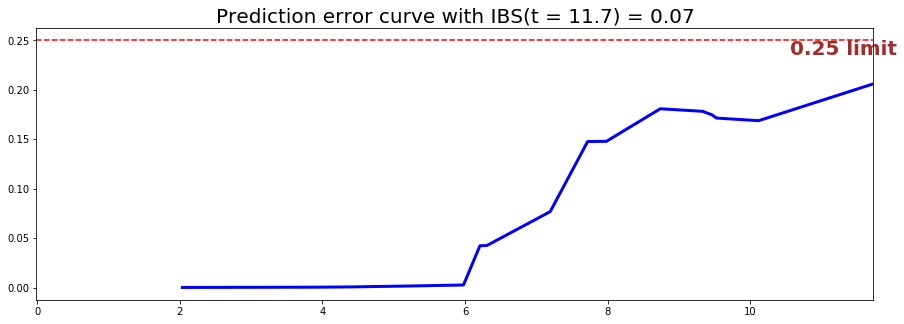

IBS: 0.07


In [36]:
co_dev, co_test = train_test_split(colinear_df, test_size = 0.2)
co_train, co_val = train_test_split(co_dev, test_size = 0.25)

# # from sklearn.model_selection import train_test_split
# N = colinear_df.shape[0]
# index_train, index_test = train_test_split(range(N), test_size = 0.35)
# fs_train = colinear_df.loc[index_train].reset_index( drop = True )
# fs_test  = colinear_df.loc[index_test].reset_index( drop = True )

# Creating the X, T and E inputs
X_trainfs, X_testfs, X_valfs= co_train[colinear_features], co_test[colinear_features], co_val[colinear_features]
T_trainfs, T_testfs, T_valfs = co_train[time_column], co_test[time_column], co_val[time_column]
E_trainfs, E_testfs, E_valfs = co_train[event_column], co_test[event_column], co_val[event_column]

rfsrc_fs = RandomSurvivalForestModel(num_trees=450) 
rfsrc_fs.fit(X_trainfs, T_trainfs, E_trainfs, max_features = 'sqrt', max_depth = 20,
        min_node_size = 5, importance_mode = 'normalized_permutation',
        seed = None, save_memory=False )
c_index = concordance_index(rfsrc_fs, X_trainfs, T_trainfs, E_trainfs)
print('Training C-index: {:.2f}'.format(c_index))

c_index_test = concordance_index(rfsrc_fs, X_testfs, T_testfs, E_testfs)
print('Testing C-index: {:.2f}'.format(c_index_test))

c_index_test = concordance_index(rfsrc_fs, X_valfs, T_valfs, E_valfs)
print('Validfation C-index: {:.2f}'.format(c_index_test))

from pysurvival.utils.display import integrated_brier_score
ibs = integrated_brier_score(rfsrc_fs, X_valfs, T_valfs, E_valfs, t_max=12,
    figure_size=(15,5))
print('IBS: {:.2f}'.format(ibs))

In [31]:
# num_tree=(100, 200, 300, 350, 400, 450, 500)
# max_depth=(1, 3, 5, 7, 9, 10, 20)
# min_node=(2, 3, 4, 5, 7, 10, 15, 20, 40)

# from sklearn.model_selection import StratifiedKFold
# from pysurvival.models.survival_forest import RandomSurvivalForestModel
# from pysurvival.utils.metrics import concordance_index
# from statistics import mean 

# for a in num_tree:
#     for b in max_depth:
#         for c in min_node:
#             cc=[]
#             kf=StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
#             i=1
#             for train_index, test_index in kf.split(Xnew,Enew):
#             X1_train, X1_test=Xnew.loc[train_index], Xnew.loc[test_index]
#             X_trainfs, X_testfs = fs_train[colinear_features], fs_test[colinear_features]
#             T_trainfs, T_testfs = fs_train[time_column], fs_test[time_column]
#             E_trainfs, E_testfs = fs_train[event_column], fs_test[event_column]
#             rfsrc_fs_f = RandomSurvivalForestModel(num_trees=a) 
#             rfsrc_fs_f.fit(X_trainfs, T_trainfs, E_trainfs, max_features = 'sqrt', max_depth = b,
#                 min_node_size = c, importance_mode = 'normalized_permutation',
#                 seed = None, save_memory=False )
            
#             c_index_fs = concordance_index(rfsrc_fs_f, X_testfs, T_testfs, E_testfs)
# #             cc.append(c_index)
#             i=i+1
#             if c_index_fs > 0.70:
#                 print(a,b, c, 'C-index: {:.2f}'.format(c_index_fs))
                 

## Model-3 rfsrc on 15 highly survival related features
### c-index: 0.5

LBP41     0.134020
GLCM11    0.138309
LBP71     0.138361
LBP72     0.138811
LBP30     0.140658
RLM6      0.144262
LBP109    0.145730
LBP35     0.148791
LBP64     0.151745
LBP93     0.155026
LBP103    0.157037
LBP111    0.158619
ACM1_3    0.161512
LBP108    0.163163
GLCM10    0.164548
GLCM2     0.167243
GLCM15    0.167243
LBP20     0.169030
LBP94     0.169614
LBP112    0.172414
LBP95     0.172896
LBP21     0.177770
LBP23     0.184533
LBP47     0.193397
LBP2      0.201342
LBP42     0.266890
LBP80     0.416469
LBP78     0.445516
LBP79     0.449264
futime    1.000000
Name: futime, dtype: float64
(117, 257)


,ACM1_1,ACM1_10,ACM1_11,ACM1_12,ACM1_13,ACM1_14,ACM1_15,ACM1_16,ACM1_17,ACM1_18,...,RLM2,RLM3,RLM4,RLM5,RLM6,RLM7,RLM8,RLM9,futime,fustatus
0,0.005652,14.103344,3.643025,-0.031772,0.463342,0.227782,35.281332,1262.353155,19399.760458,6.647843,...,27.922374,81.995370,60.278950,0.051357,0.635074,5.118797,0.031866,0.209982,60.945810,0
1,0.005249,12.600853,3.642172,-0.035297,0.483296,0.205330,35.071310,1099.993620,16520.533880,6.949950,...,29.465959,105.277962,57.452313,0.052319,0.723840,3.336156,0.031279,0.129114,90.778045,0
2,0.004918,14.233939,3.683398,-0.020597,0.378239,0.179889,36.979492,1041.285112,15938.579271,7.081231,...,29.364991,131.571619,109.276577,0.085648,0.621201,5.727761,0.026018,0.214208,17.774492,1
3,0.006464,15.939126,3.704555,-0.070308,0.649454,0.342996,39.381842,888.751762,13008.202352,6.403879,...,20.167049,70.492623,29.228525,0.032898,0.747418,2.995489,0.077869,0.222278,138.056223,0
4,0.005472,13.759262,3.659069,-0.034117,0.472380,0.216427,36.350655,1035.914868,15617.955183,6.698934,...,23.401739,110.820245,56.221209,0.056301,0.710800,3.517652,0.046809,0.193587,37.421713,1


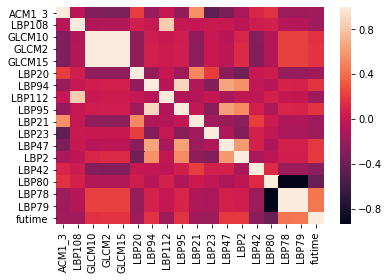

In [5]:
import seaborn as sns
dataset_corrmat = dataset.corr()
dataset_corrs = dataset_corrmat['futime'].abs().sort_values()
print(dataset_corrs.tail(30))

strong_corrs = dataset_corrs[dataset_corrs > 0.160]
corrmat_data = dataset[strong_corrs.index]
corrmat = corrmat_data.corr()
ax =  sns.heatmap(corrmat)


final_corr_cols = strong_corrs.drop(['GLCM15','GLCM10','LBP78','LBP112','futime'])
fs2_features = final_corr_cols.index
fs2_df = dataset[features]
fs2_df['futime'] = dataset['futime']
fs2_df['fustatus'] = dataset['fustatus']
print(fs2_df.shape)
fs2_df.head()
# fs2_features = np.setdiff1d(dataset.columns, [time_column, event_column] ).tolist()

In [41]:
N = fs2_df.shape[0]
index_train, index_test = train_test_split( range(N), test_size = 0.35)
fs2_train = fs2_df.loc[index_train].reset_index( drop = True )
fs2_test  = fs2_df.loc[index_test].reset_index( drop = True )

# Creating the X, T and E inputs
X_trainfs2, X_testfs2 = fs2_train[fs2_features], fs2_test[fs2_features]
T_trainfs2, T_testfs2 = fs2_train [time_column], fs2_test[time_column]
E_trainfs2, E_testfs2 = fs2_train [event_column], fs2_test[event_column]

xst = RandomSurvivalForestModel(num_trees=350) 
xst.fit(X_trainfs2, T_trainfs2, E_trainfs2, max_features = 'sqrt', max_depth = 20,
        min_node_size = 3, importance_mode = 'normalized_permutation',
        seed = None, save_memory=False )
c_index = concordance_index(xst, X_trainfs2, T_trainfs2, E_trainfs2)
print('Training C-index: {:.2f}'.format(c_index))

c_index_test = concordance_index(xst, X_testfs2, T_testfs2, E_testfs2)
print('Testing C-index: {:.2f}'.format(c_index_test)) 

Training C-index: 0.86
Testing C-index: 0.51


#### using search_grid to find the best parameters combination of rfsrc

In [ ]:
# num_tree=(100, 200, 300, 350, 400, 450)
# max_depth=(1, 2, 3, 4, 5, 7, 9, 10, 20)
# min_node=(2, 3, 4, 5, 7, 10, 15, 20, 40)

# from sklearn.model_selection import StratifiedKFold
# from pysurvival.models.survival_forest import RandomSurvivalForestModel
# from pysurvival.utils.metrics import concordance_index
# from statistics import mean 

# for a in num_tree:
#     for b in max_depth:
#         for c in min_node:
# #             cc=[]
# #             kf=StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
#             i=1
# #             for train_index, test_index in kf.split(Xnew,Enew):
# #             X1_train, X1_test=Xnew.loc[train_index], Xnew.loc[test_index]
#             X_trainfs2, X_testfs2 = fs2_train[fs2_features], fs2_test[fs2_features]
#             T_trainfs2, T_testfs2 = fs2_train [time_column], fs2_test[time_column]
#             E_trainfs2, E_testfs2 = fs2_train [event_column], fs2_test[event_column]
#             xs = RandomSurvivalForestModel(num_trees=a) 
#             xs.fit(X_trainfs2, T_trainfs2, E_trainfs2, max_features = 'sqrt', max_depth = b,
#                 min_node_size = c, importance_mode = 'normalized_permutation',
#                 seed = None, save_memory=False )
            
#             c_index_t = concordance_index(xs, X_testfs2, T_testfs2, E_testfs2)
# #             cc.append(c_index)
#             i=i+1
#             if c_index_t > 0.7:
#                 print(a,b, c, 'C-index: {:.2f}'.format(c_index_t))
                 

## Model 4 - rfsrc on variables chosen by the minimal depth variable selection algorithm
### c-index:

In [6]:
var.s_features = ['LBP13', 'LBP65', 'ACM1_6','GLCM15','LBP18', 'LBP48', 'LBP93', 'ACM2_2','GLCM1','GLCM2','GLCM4','GLCM13','GLCM19','IH4', 'LBP2']
var.s_df = dataset[var.s_features]
var.s_df['futime'] = dataset['futime']
var.s_df['fustatus'] = dataset['fustatus']
var.s_df

,LBP13,LBP65,ACM1_6,GLCM15,LBP18,LBP48,LBP93,ACM2_2,GLCM1,GLCM2,GLCM4,GLCM13,GLCM19,IH4,LBP2,futime,fustatus
0,0.008590,0.087979,15.932042,3.001331,0.006290,0.007431,0.015727,32.527950,0.030870,3.001331,3.866741,0.721671,0.969130,3.813549,0.007251,60.945810,0
1,0.010831,0.058254,15.331201,5.194088,0.008811,0.008288,0.023650,33.631275,0.021078,5.194088,4.385497,0.541302,0.978922,3.299277,0.015669,90.778045,0
2,0.007297,0.089375,15.112432,2.814317,0.009056,0.010976,0.029646,35.199570,0.035745,2.814317,3.124458,0.629855,0.964255,3.717017,0.015111,17.774492,1
3,0.007304,0.085858,14.696914,6.939005,0.005149,0.007304,0.022752,36.164748,0.016925,6.939005,6.950767,0.683848,0.983075,3.168087,0.022274,138.056223,0
4,0.007348,0.078039,15.065011,5.176402,0.009369,0.011216,0.017158,34.999567,0.020551,5.176402,5.502904,0.641067,0.979449,3.077738,0.015371,37.421713,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.008958,0.073004,14.242051,3.080864,0.007813,0.005430,0.021298,31.187236,0.038434,3.080864,3.063942,0.607356,0.961566,5.039791,0.010313,13.240518,0
113,0.013033,0.122038,15.022215,1.450499,0.013179,0.022981,0.017010,32.563921,0.052258,1.450499,3.233007,0.852596,0.947742,3.833531,0.006686,15.408941,0
114,0.004673,0.079870,14.383987,1.850561,0.008140,0.006377,0.020237,34.225167,0.052259,1.850561,2.718180,0.736776,0.947741,4.440842,0.012343,11.729194,0
115,0.008385,0.072421,14.599456,1.570262,0.005596,0.007125,0.016144,29.922108,0.083544,1.570262,1.351233,0.489762,0.916456,5.596616,0.014364,12.024888,0


In [9]:
vs_dev, vs_test = train_test_split(var.s_df, test_size = 0.1)
vs_train, vs_val = train_test_split(vs_dev, test_size = 0.15)

# # from sklearn.model_selection import train_test_split
# N = var.s_df.shape[0]
# index_train, index_test = train_test_split( range(N), test_size = 0.35)
# vs_train = var.s_df.loc[index_train].reset_index( drop = True )
# vs_test  = var.s_df.loc[index_test].reset_index( drop = True )

# Creating the X, T and E inputs
X_trainvs, X_testvs, X_valvs = vs_train[var.s_features], vs_test[var.s_features], vs_val[var.s_features]
T_trainvs, T_testvs, T_valvs = vs_train[time_column], vs_test[time_column], vs_val[time_column]
E_trainvs, E_testvs, E_valvs = vs_train[event_column], vs_test[event_column], vs_val[event_column]

rfsrc_vs = RandomSurvivalForestModel(num_trees=350) 
rfsrc_vs.fit(X_trainvs, T_trainvs, E_trainvs, max_features = 'sqrt', max_depth = 10,
        min_node_size = 5, importance_mode = 'normalized_permutation',
        seed = None, save_memory=False )
c_index = concordance_index(rfsrc_vs, X_trainvs, T_trainvs, E_trainvs)
print('Training C-index: {:.2f}'.format(c_index))

c_index_test = concordance_index(rfsrc_vs, X_testvs, T_testvs, E_testvs)
print('Testing C-index: {:.2f}'.format(c_index_test)) 

c_index_val = concordance_index(rfsrc_vs, X_valvs, T_valvs, E_valvs)
print('Validation C-index: {:.2f}'.format(c_index_val)) 

Training C-index: 0.82
Testing C-index: 0.68
Validation C-index: 0.83


In [8]:
variable_importance_vs = rfsrc_vs.variable_importance_table.head(20)
variable_importance_vs

,feature,importance,pct_importance
0,LBP48,3.898825,0.604687
1,LBP13,1.403346,0.217651
2,ACM2_2,1.014996,0.157420
3,LBP93,0.130512,0.020242
4,GLCM2,-0.072042,0.000000
5,LBP2,-0.280216,0.000000
6,IH4,-0.441389,0.000000
7,LBP65,-0.641932,0.000000
8,GLCM15,-1.209295,0.000000
9,GLCM13,-1.469781,0.000000


ACM1_6      0.002527
LBP18       0.017337
LBP13       0.036828
LBP48       0.036980
LBP65       0.052857
GLCM4       0.065536
ACM2_2      0.078271
GLCM1       0.083035
GLCM19      0.083035
GLCM13      0.088782
IH4         0.115808
fustatus    0.129473
LBP93       0.155026
GLCM2       0.167243
GLCM15      0.167243
LBP2        0.201342
futime      1.000000
Name: futime, dtype: float64


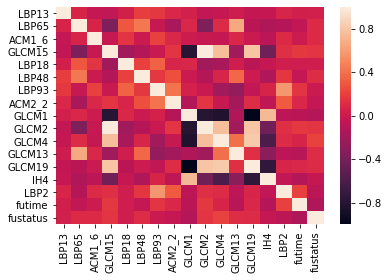

In [11]:
import seaborn as sns
var.s_df_corrmat = var.s_df.corr()
var.s_df_corrs = var.s_df_corrmat['futime'].abs().sort_values()
print(var.s_df_corrs)
ax =  sns.heatmap(var.s_df_corrmat)
# strong_corrs = var.s_df_corrs[var.s_df_corrs > 0.160]
# corrmat_data = dataset[strong_corrs.index]
# corrmat = corrmat_data.corr()
# ax =  sns.heatmap(corrmat)

## Model 5 - rfsrc on variables chosen by the minimal depth variable selection algorithm but dropping highly correlated features
### dropping 'GLCM2'
### c-index : 0.82

In [12]:
final_corr_cols = var.s_df_corrs.drop(['GLCM2'])
vs2_features = final_corr_cols.index
vs2_df = dataset[vs2_features]
vs2_df['futime'] = dataset['futime']
vs2_df['fustatus'] = dataset['fustatus']
print(vs2_df.shape)
vs_dev, vs_test = train_test_split(var.s_df, test_size = 0.1)
vs_train, vs_val = train_test_split(vs_dev, test_size = 0.15)

vs2_df.head()

(117, 16)


,ACM1_6,LBP18,LBP13,LBP48,LBP65,GLCM4,ACM2_2,GLCM1,GLCM19,GLCM13,IH4,fustatus,LBP93,GLCM15,LBP2,futime
0,15.932042,0.006290,0.008590,0.007431,0.087979,3.866741,32.527950,0.030870,0.969130,0.721671,3.813549,0,0.015727,3.001331,0.007251,60.945810
1,15.331201,0.008811,0.010831,0.008288,0.058254,4.385497,33.631275,0.021078,0.978922,0.541302,3.299277,0,0.023650,5.194088,0.015669,90.778045
2,15.112432,0.009056,0.007297,0.010976,0.089375,3.124458,35.199570,0.035745,0.964255,0.629855,3.717017,1,0.029646,2.814317,0.015111,17.774492
3,14.696914,0.005149,0.007304,0.007304,0.085858,6.950767,36.164748,0.016925,0.983075,0.683848,3.168087,0,0.022752,6.939005,0.022274,138.056223
4,15.065011,0.009369,0.007348,0.011216,0.078039,5.502904,34.999567,0.020551,0.979449,0.641067,3.077738,1,0.017158,5.176402,0.015371,37.421713


In [15]:
vs_dev2, vs_test2 = train_test_split(vs2_df, test_size = 0.1)
vs_train2, vs_val2 = train_test_split(vs_dev2, test_size = 0.15)

# # from sklearn.model_selection import train_test_split
# N = vs2_df.shape[0]
# index_train, index_test = train_test_split( range(N), test_size = 0.35)
# vs_train2 = vs2_df.loc[index_train].reset_index( drop = True )
# vs_test2  = vs2_df.loc[index_test].reset_index( drop = True )

# Creating the X, T and E inputs
X_trainvs2, X_testvs2, X_valvs2 = vs_train2[vs2_features], vs_test2[vs2_features], vs_val2[vs2_features]
T_trainvs2, T_testvs2, T_valvs2 = vs_train2[time_column], vs_test2[time_column], vs_val2[time_column]
E_trainvs2, E_testvs2, E_valvs2 = vs_train2[event_column], vs_test2[event_column], vs_val2[event_column]

In [16]:
rfsrc_vs2 = RandomSurvivalForestModel(num_trees=400) 
rfsrc_vs2.fit(X_trainvs2, T_trainvs2, E_trainvs2, max_features = 'sqrt', max_depth = 10,
        min_node_size = 10, importance_mode = 'normalized_permutation',
        seed = None, save_memory=False )
c_index = concordance_index(rfsrc_vs2,X_trainvs2, T_trainvs2, E_trainvs2)
print('C-index: {:.2f}'.format(c_index))

c_index_test = concordance_index(rfsrc_vs2, X_testvs2, T_testvs2, E_testvs2)
print('C-index: {:.2f}'.format(c_index_test)) 

c_index_vs2 = concordance_index(rfsrc_vs2, X_valvs2, T_valvs2, E_valvs2)
print('Validation C-index: {:.2f}'.format(c_index_vs2)) 

C-index: 0.95
C-index: 0.97
Validation C-index: 1.00


In [83]:
X_trainvs

,LBP13,LBP65,ACM1_6,GLCM15,LBP18,LBP48,LBP93,ACM2_2,GLCM1,GLCM2,GLCM4,GLCM13,GLCM19,IH4,LBP2
54,0.008059,0.076788,15.077267,2.723539,0.007107,0.009479,0.024242,34.869922,0.036223,2.723539,2.683766,0.577809,0.963777,3.303522,0.012790
99,0.006223,0.097160,15.006337,2.627586,0.009091,0.006415,0.020237,37.827603,0.031160,2.627586,4.110881,0.768451,0.968840,3.146960,0.011590
94,0.004373,0.076988,14.995990,5.727877,0.007407,0.008725,0.015062,31.227135,0.021064,5.727877,5.446227,0.633928,0.978936,3.699425,0.005690
68,0.007606,0.100432,15.286220,1.651409,0.006162,0.009085,0.021109,30.576098,0.043494,1.651409,3.769030,0.850743,0.956506,3.692872,0.017527
57,0.006178,0.078628,14.885818,3.399454,0.005697,0.002920,0.020156,33.142337,0.032604,3.399454,4.152941,0.683750,0.967396,4.788537,0.009727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,0.006258,0.065752,15.233873,2.799592,0.003448,0.005657,0.017963,32.544274,0.041191,2.799592,2.861286,0.586748,0.958809,4.377652,0.009399
59,0.008120,0.074596,15.121243,2.271061,0.007954,0.007392,0.020089,34.828963,0.050765,2.271061,2.238063,0.577490,0.949235,4.359820,0.015492
42,0.007814,0.066631,14.807352,1.457751,0.008289,0.008186,0.023679,36.098616,0.079798,1.457751,1.211282,0.481985,0.920202,7.921836,0.017066
89,0.008690,0.079076,15.188739,4.087256,0.006880,0.004668,0.014057,31.779326,0.021881,4.087256,5.329258,0.708973,0.978119,3.375823,0.011170


In [68]:
num_tree=(100, 200, 300, 350, 400, 450, 500, 530, 550, 600,630,650)
max_depth=(1, 5,10, 20,25,30,35)
min_node=(2, 3, 4, 5, 7, 10, 15)
from sklearn.model_selection import StratifiedKFold
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.utils.metrics import concordance_index
from statistics import mean 

for a in num_tree:
    for b in max_depth:
        for c in min_node:
#             cc=[]
#             kf=StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
            i=1
#             for train_index, test_index in kf.split(Xnew,Enew):
#             X1_train, X1_test=Xnew.loc[train_index], Xnew.loc[test_index]
            X_trainvs, X_testvs = vs_train[var.s_features], vs_test[var.s_features]
            T_trainvs, T_testvs = vs_train[time_column], vs_test[time_column]
            E_trainvs, E_testvs = vs_train[event_column], vs_test[event_column]
            vs = RandomSurvivalForestModel(num_trees=a) 
            vs.fit(X_trainvs, T_trainvs, E_trainvs, max_features = 'sqrt', max_depth = b,
                min_node_size = c, importance_mode = 'normalized_permutation',
                seed = None, save_memory=False )
            
            c_index_vs = concordance_index(vs, X_testvs, T_testvs, E_testvs)
#             cc.append(c_index)
            i=i+1
            if c_index_vs > 0.7:
                print(a,b, c, 'C-index: {:.2f}'.format(c_index_vs))
                 

#### implementing the model

In [82]:
variable_importance_vs2 = rfsrc_vs2.variable_importance_table.head(20)
variable_importance_vs2

,feature,importance,pct_importance
0,futime,13.699863,0.389189
1,fustatus,11.405304,0.324005
2,IH4,2.882511,0.081887
3,LBP48,2.650995,0.075310
4,GLCM4,2.523000,0.071674
5,LBP13,1.089175,0.030942
6,GLCM15,0.584127,0.016594
7,ACM1_6,0.323274,0.009184
8,GLCM19,0.042782,0.001215
9,ACM2_2,-0.262895,0.000000


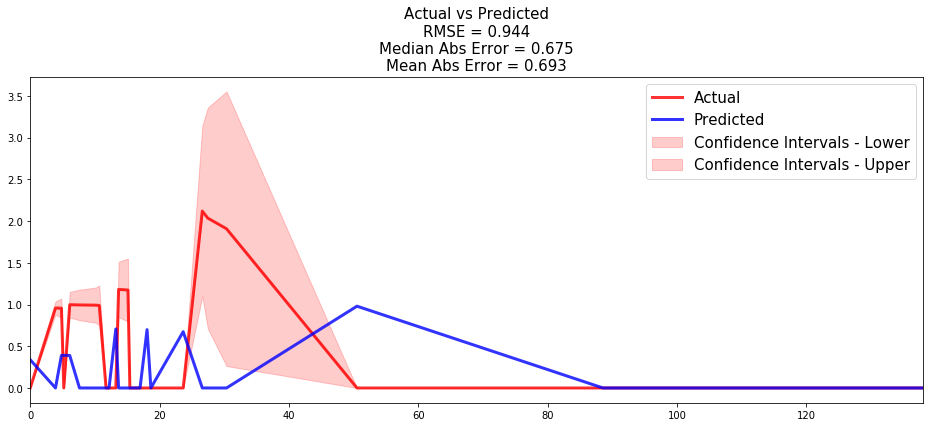

In [71]:
from pysurvival.utils.display import compare_to_actual
results = compare_to_actual(rfsrc_vs2, X_testvs2, T_testvs2, E_testvs2,
                            is_at_risk = False,  figure_size=(16, 6),
                            metrics = ['rmse', 'mean', 'median'])

In [73]:
from pysurvival.utils.display import create_risk_groups

risk_groups = create_risk_groups(model=rfsrc_vs2, X=X_testvs2,
    use_log = False, num_bins=30, figure_size=(20, 4),
    )

## Model 6 - Cox Model on
### c-index : 0.82

Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 165.211 - ||grad||^2 = 70.89822
 * Iteration #2 - Loss = 126.639 - ||grad||^2 = 40.71268
 * Iteration #3 - Loss = 107.838 - ||grad||^2 = 26.22501
 * Iteration #4 - Loss = 90.600 - ||grad||^2 = 16.97687
 * Iteration #5 - Loss = 74.803 - ||grad||^2 = 10.55084
 * Iteration #6 - Loss = 61.434 - ||grad||^2 = 6.53439
 * Iteration #7 - Loss = 50.218 - ||grad||^2 = 4.10772
 * Iteration #8 - Loss = 40.828 - ||grad||^2 = 2.61126
 * Iteration #9 - Loss = 33.131 - ||grad||^2 = 1.67984
 * Iteration #10 - Loss = 27.055 - ||grad||^2 = 1.08368
 * Iteration #11 - Loss = 22.586 - ||grad||^2 = 0.68191
 * Iteration #12 - Loss = 19.598 - ||grad||^2 = 0.42141
 * Iteration #13 - Loss = 17.764 - ||grad||^2 = 0.25316
 * Iteration #14 - Loss = 16.715 - ||grad||^2 = 0.14622
 * Iteration #15 - Loss = 16.145 - ||grad||^2 = 0.08148
 * Iteration #16 - Loss = 15.847 - ||grad||^2 = 0.04409
 * Iteration #17 - Loss = 15.694 - ||grad||^2 = 0.02328
 * Iterati

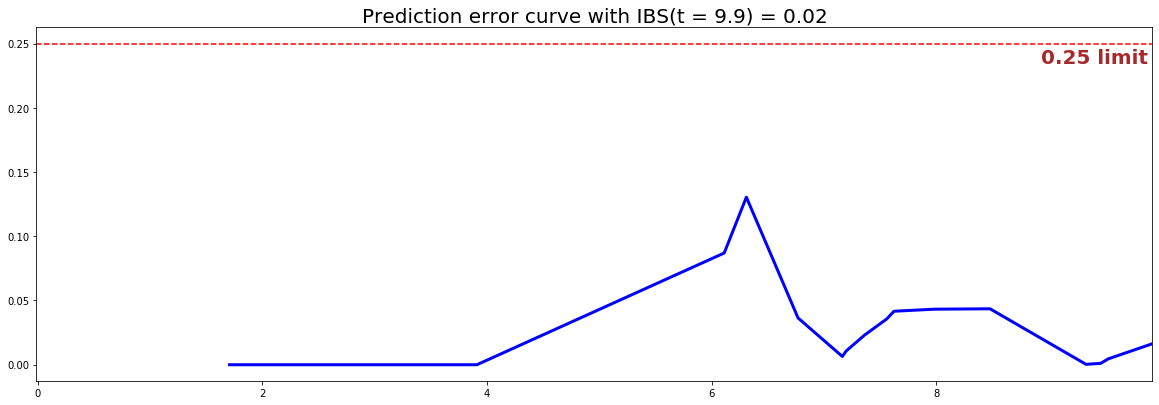

IBS: 0.02


In [84]:
from pysurvival.models.semi_parametric import CoxPHModel
from pysurvival.utils.metrics import concordance_index
from pysurvival.utils.display import integrated_brier_score
#%pylab inline
#### 3 - Creating the modeling dataset
# Building training and testing sets #
N = vs2_df.shape[0]
index_train, index_test = train_test_split(range(N), test_size = 0.2)
data_train = vs2_df.loc[index_train].reset_index( drop = True )
data_test  = vs2_df.loc[index_test].reset_index( drop = True )

# Creating the X, T and E input
X_train, X_test = data_train[vs2_features], data_test[vs2_features]
T_train, T_test = data_train['futime'].values, data_test['futime'].values
E_train, E_test = data_train['fustatus'].values, data_test['fustatus'].values


#### 4 - Creating an instance of the Cox PH model and fitting the data.
# Building the model
coxph = CoxPHModel()
coxph.fit(X_train, T_train, E_train, lr=0.5, l2_reg=1e-2, init_method='zeros')


#### 5 - Cross Validation / Model Performances
c_index = concordance_index(coxph, X_test, T_test, E_test) #0.92
print('C-index: {:.2f}'.format(c_index))

ibs = integrated_brier_score(coxph, X_test, T_test, E_test, t_max=10,
            figure_size=(20, 6.5) )
print('IBS: {:.2f}'.format(ibs))

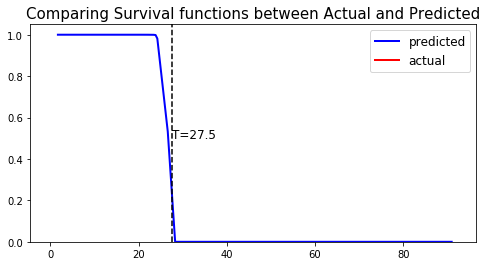

In [86]:
fig, ax = plt.subplots(figsize=(8, 4))

# Randomly extracting a data-point that experienced an event 
choices = np.argwhere((E_test==1.)&(T_test>=1)).flatten()
k = np.random.choice( choices, 1)[0]

# Saving the time of event
t = T_test[k]

# Computing the Survival function for all times t
predicted = coxph.predict_survival(X_test.values[k, :]).flatten()
actual = data_train['futime']

# Displaying the functions
plt.plot(coxph.times, predicted, color='blue', label='predicted', lw=2)
plt.plot(actual, color = 'red', label='actual', lw=2)

# Actual time
plt.axvline(x=t, color='black', ls ='--')
ax.annotate('T={:.1f}'.format(t), xy=(t, 0.5), xytext=(t, 0.5), fontsize=12)

# Show everything
title = "Comparing Survival functions between Actual and Predicted"
plt.legend(fontsize=12)
plt.title(title, fontsize=15)
plt.ylim(0, 1.05)
plt.show()

In [25]:
cph.print_summary()

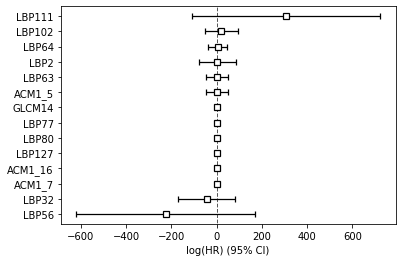

In [27]:
cph.plot()

## Hazard Ratio

#### comparethe hazard ratio between two individuals

In [28]:
def hazard_ratio(case_1, case_2, cox_params):
    '''
    Return the hazard ratio of case_1 : case_2 using
    the coefficients of the cox model.
    
    Args:
        case_1 (np.array): (1 x d) array of covariates
        case_2 (np.array): (1 x d) array of covariates
        model (np.array): (1 x d) array of cox model coefficients
    Returns:
        hazard_ratio (float): hazard ratio of case_1 : case_2
    '''
    

    
    hr = np.exp(cox_params.dot((case_1 - case_2).T))
    
    
    return hr

In [29]:
i = 0
case_1 = df_train.iloc[i, :].drop(['futime', 'fustatus'])

j = 2
case_2 = df_train.iloc[j, :].drop(['futime', 'fustatus'])
 
print(hazard_ratio(case_1.values, case_2.values, cph.params_.values))

0.529074433353618


#### case 1 is at lower risk.

In [21]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def harrell_c(y_true, scores, event):
    '''
    Compute Harrel C-index given true event/censoring times,
    model output, and event indicators.
    
    Args:
        y_true (array): array of true event times
        scores (array): model risk scores
        event (array): indicator, 1 if event occurred at that index, 0 for censorship
    Returns:
        result (float): C-index metric
    '''
    
    n = len(y_true)
    assert (len(scores) == n and len(event) == n)
    
    concordant = 0.0
    permissible = 0.0
    ties = 0.0
    
    result = 0.0
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' and 'pass' with your code) ###
    
    # use double for loop to go through cases
    for i in range(n):
        # set lower bound on j to avoid double counting
        for j in range(i+1, n):
            
            # check if at most one is censored
            if event[i] == 1 or event[j] == 1:
                # check if neither are censored
                if event[i] == 1 and event[j] == 1:
                    
                    permissible += 1.0
                    
                    # check if scores are tied
                    if scores[i] == scores[j]:
                        ties += 1.0
                    # check for concordant
                    elif y_true[i] < y_true[j] and scores[i] > scores[j]:
                        concordant += 1.0
                    elif y_true[i] > y_true[j] and scores[i] < scores[j]:
                        concordant += 1.0
                
                # check if one is censored
                elif event[i] != event[j]:
                    
                    # get censored index
                    censored = j
                    uncensored = i
                    
                    if event[i] == 0:
                        censored = i
                        uncensored = j
                        
                    # check if permissible
                    # Note: in this case, we are assuming that censored at a time
                    # means that you did NOT die at that time. That is, if you
                    # live until time 30 and have event = 0, then you lived THROUGH
                    # time 30.
                    if y_true[uncensored] <= y_true[censored]:
                        permissible += 1.0
                        
                        # check if scores are tied
                        if scores[uncensored] == scores[censored]:
                            # update ties 
                            ties += 1.0
                            
                        # check if scores are concordant 
                        if scores[uncensored] > scores[censored]:
                            concordant += 1.0
    
    # set result to c-index computed from number of concordant pairs,
    # number of ties, and number of permissible pairs (REPLACE 0 with your code)  
    result = (concordant + 0.5*ties) / permissible
    
    ### END CODE HERE ###
    
    return result   

In [22]:
# Train
scores = cph.predict_partial_hazard(df_train)
cox_train_scores = harrell_c(df_train['futime'].values, scores.values, df_train['fustatus'].values)

# Test
scores = cph.predict_partial_hazard(df_test)
cox_test_scores = harrell_c(df_test['futime'].values, scores.values, df_test['fustatus'].values)

print("Train:", cox_train_scores)

print("Test:", cox_test_scores)

Train: 0.6822938467978233
Test: 0.45263157894736844


In [35]:
variable_importance_fs2 = xst.variable_importance_table.head(20)
variable_importance_fs2

,feature,importance,pct_importance
0,LBP47,6.511889,0.708372
1,LBP80,1.193192,0.129797
2,LBP108,0.905788,0.098533
3,LBP20,0.409920,0.044592
4,GLCM2,0.171959,0.018706
5,LBP2,-0.284424,0.000000
6,LBP79,-0.811827,0.000000
7,ACM1_3,-1.027665,0.000000
8,LBP95,-1.081719,0.000000
9,LBP21,-1.492802,0.000000


## To find the best-performing set of hyperparameters.

Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 102.668 - ||grad||^2 = 93.81350
 * Iteration #2 - Loss = 44.273 - ||grad||^2 = 49.90683
 * Iteration #3 - Loss = 33.352 - ||grad||^2 = 31.83117
 * Iteration #4 - Loss = 25.029 - ||grad||^2 = 20.89572
 * Iteration #5 - Loss = 18.766 - ||grad||^2 = 13.75009
 * Iteration #6 - Loss = 14.023 - ||grad||^2 = 9.01039
 * Iteration #7 - Loss = 10.515 - ||grad||^2 = 5.86838
 * Iteration #8 - Loss = 7.966 - ||grad||^2 = 3.80404
 * Iteration #9 - Loss = 6.150 - ||grad||^2 = 2.46203
 * Iteration #10 - Loss = 4.888 - ||grad||^2 = 1.57882
 * Iteration #11 - Loss = 4.035 - ||grad||^2 = 1.00242
 * Iteration #12 - Loss = 3.488 - ||grad||^2 = 0.63029
 * Iteration #13 - Loss = 3.141 - ||grad||^2 = 0.39238
 * Iteration #14 - Loss = 2.930 - ||grad||^2 = 0.24491
 * Iteration #15 - Loss = 2.777 - ||grad||^2 = 0.14979
 * Iteration #16 - Loss = 2.687 - ||grad||^2 = 0.09112
 * Iteration #17 - Loss = 2.636 - ||grad||^2 = 0.05584
 * Iteration #18 - Los

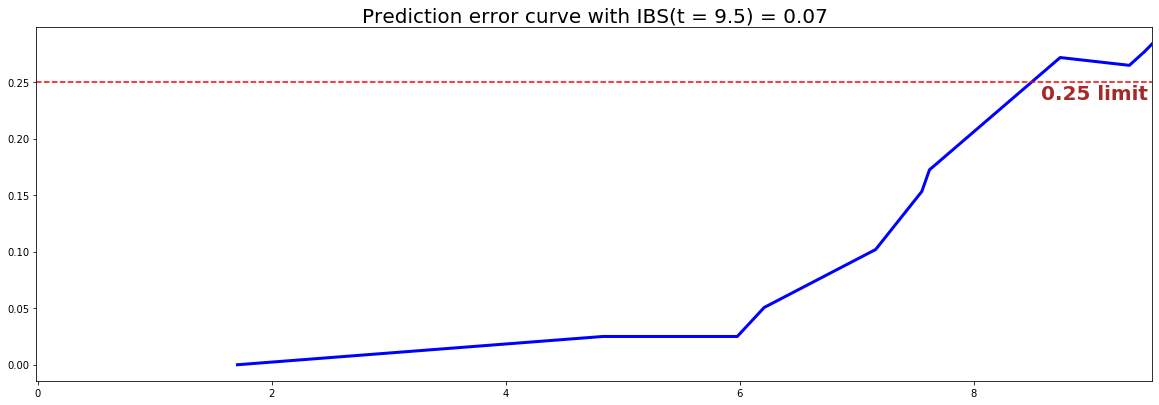

IBS: 0.07


In [13]:
from pysurvival.models.semi_parametric import CoxPHModel
coxph = CoxPHModel()
coxph.fit(X_train, T_train, E_train, lr=0.5, l2_reg=1e-2, init_method='zeros')


#### 5 - Cross Validation / Model Performances
c_index = concordance_index(coxph, X_test, T_test, E_test) #0.92
print('C-index: {:.2f}'.format(c_index))

ibs = integrated_brier_score(coxph, X_test, T_test, E_test, t_max=10,
            figure_size=(20, 6.5) )
print('IBS: {:.2f}'.format(ibs))

In [14]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lifelines import CoxPHFitter
from lifelines.utils import concordance_index as cindex
from sklearn.model_selection import train_test_split

In [2]:
rfsrc_15_features = variable_importance['feature'].iloc[0:14].values

#create a dataset for 15 rfsrc important features
rfsrc_15_df = dataset[rfsrc_15_features]
rfsrc_15_df['futime'] = dataset['futime']
rfsrc_15_df['fustatus'] = dataset['fustatus']
rfsrc_15_df

NameError: name 'variable_importance' is not defined


 1 of kfold 10
Test C-index: 0.92


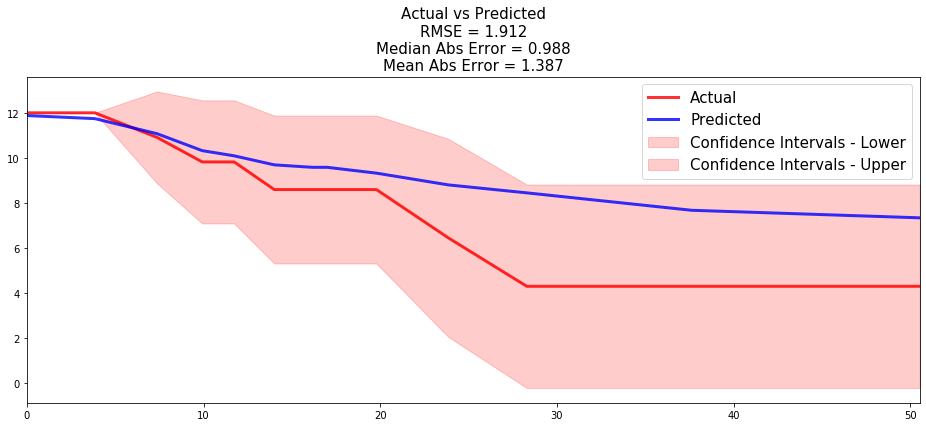

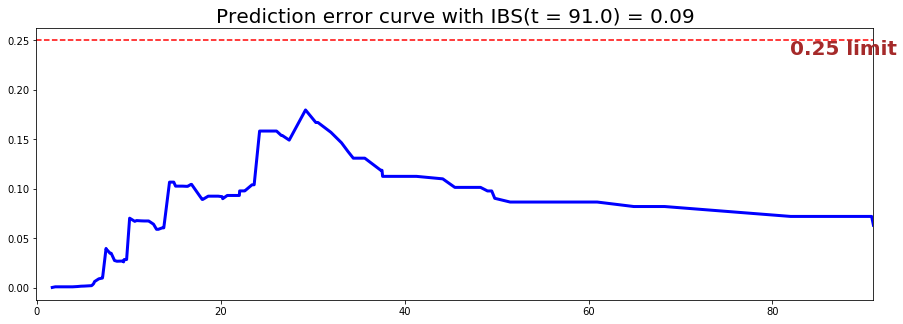

IBS: 0.09

 2 of kfold 10
Test C-index: 0.91


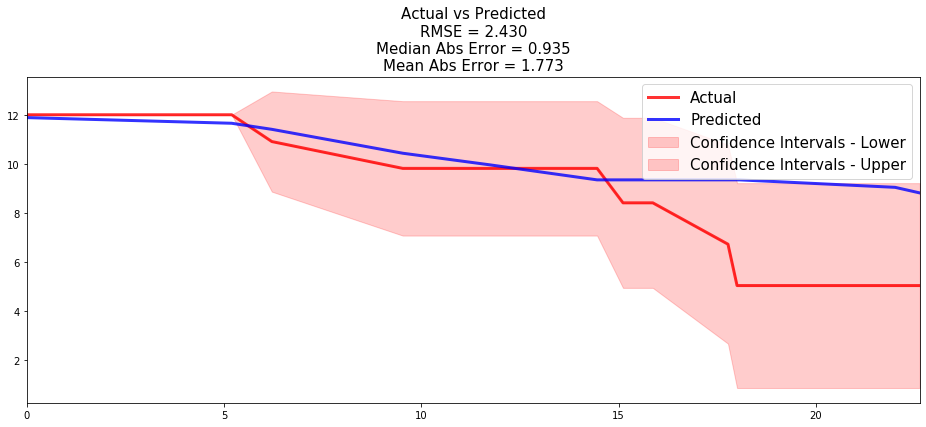

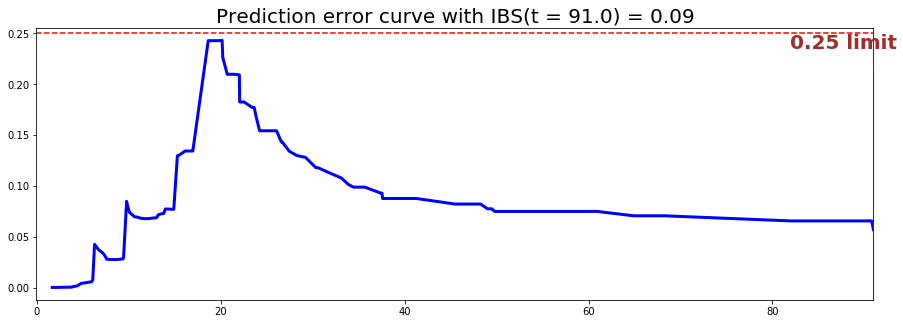

IBS: 0.09

 3 of kfold 10
Test C-index: 0.94


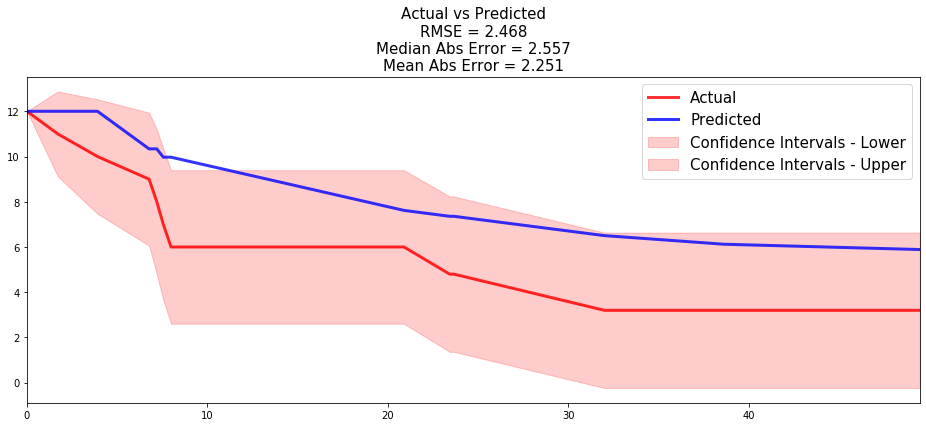

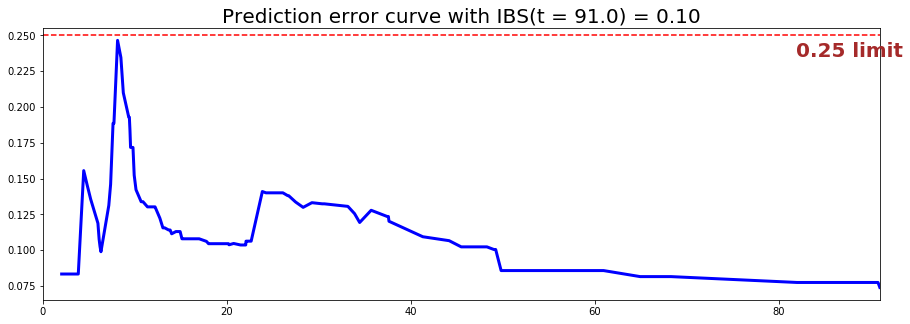

IBS: 0.10

 4 of kfold 10
Test C-index: 0.89


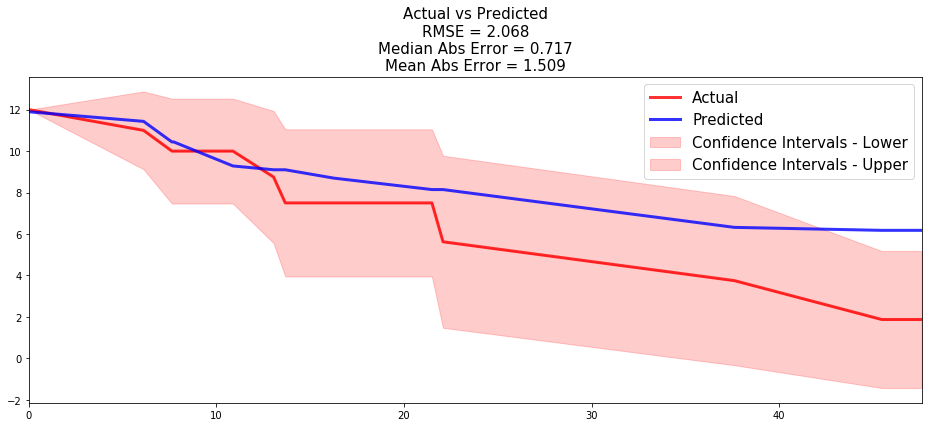

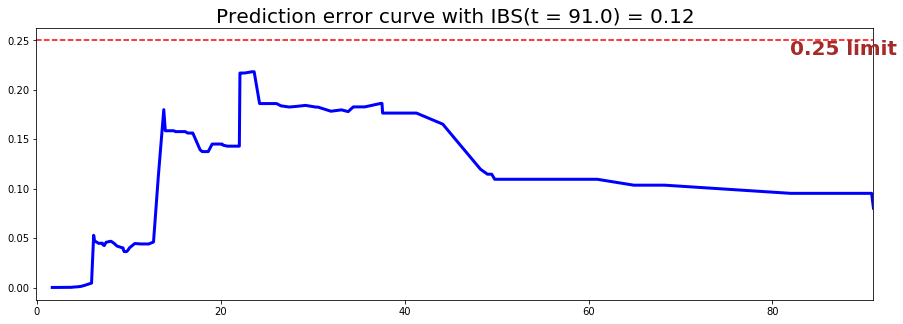

IBS: 0.12

 5 of kfold 10
Test C-index: 0.67


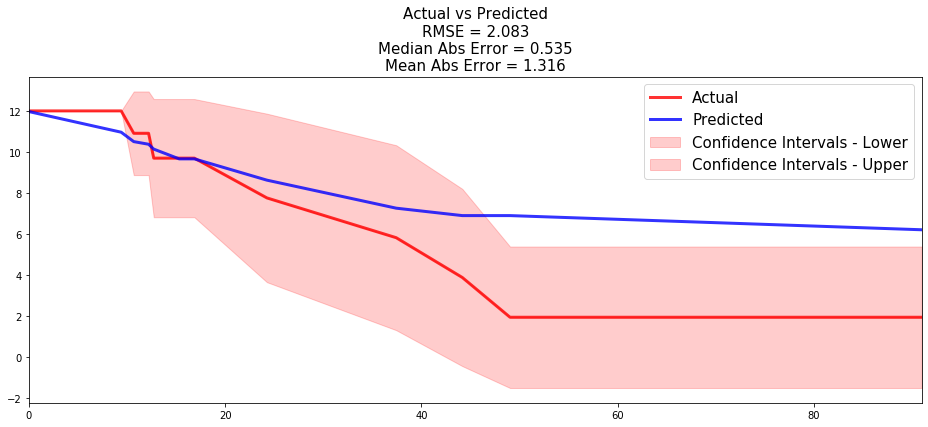

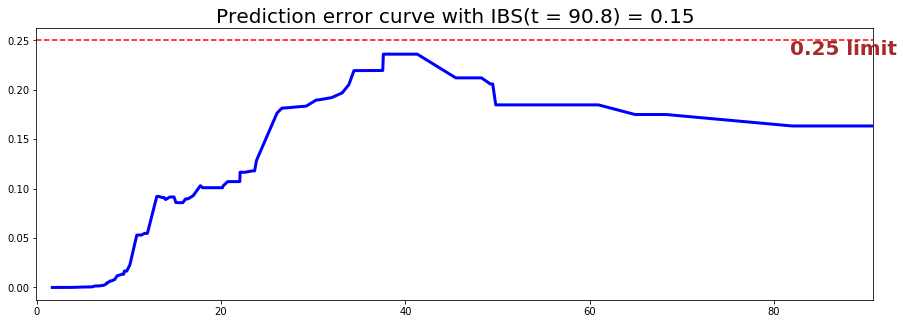

IBS: 0.15

 6 of kfold 10
Test C-index: 0.69


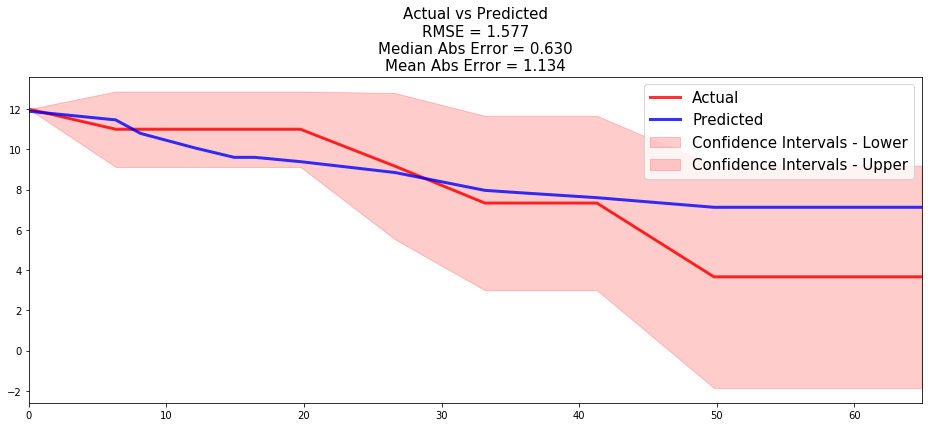

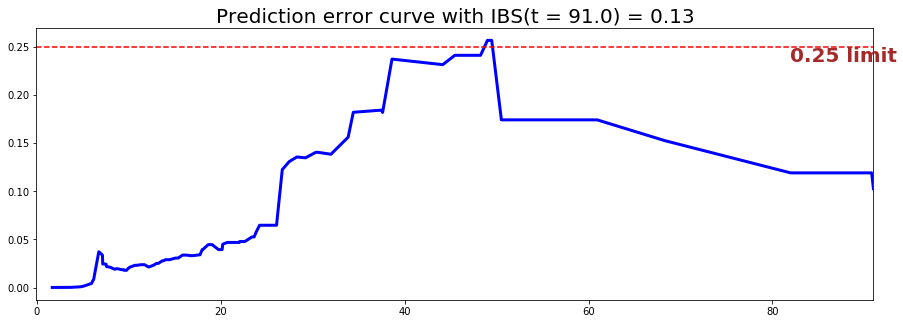

IBS: 0.13

 7 of kfold 10
Test C-index: 1.00


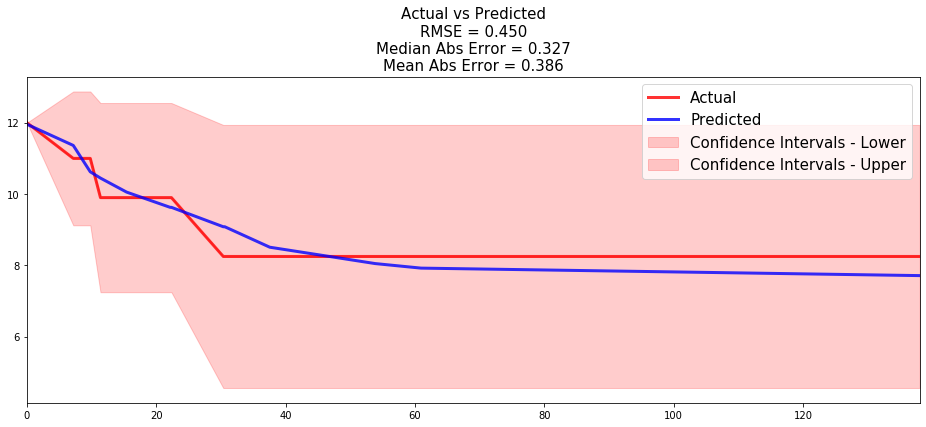

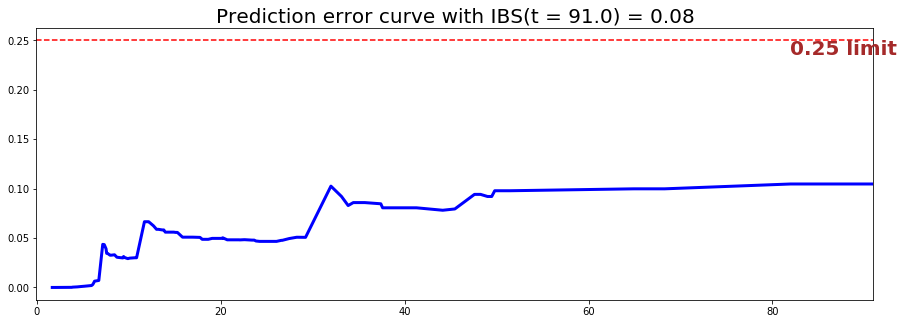

IBS: 0.08

 8 of kfold 10
Test C-index: 1.00


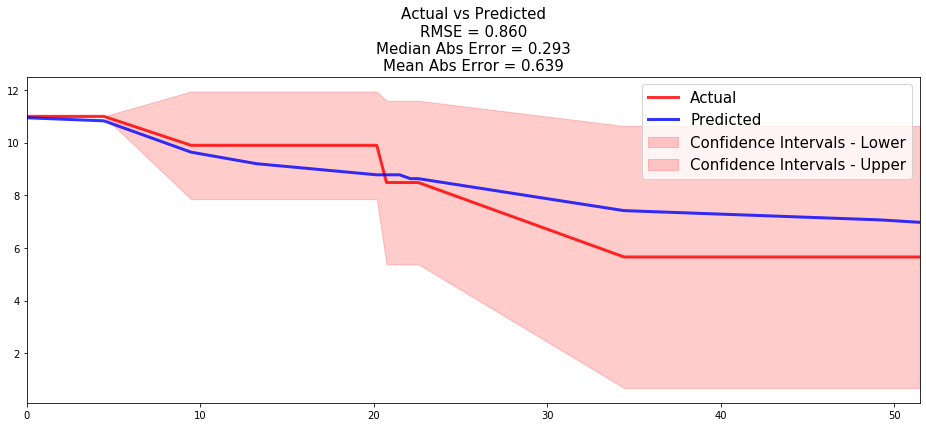

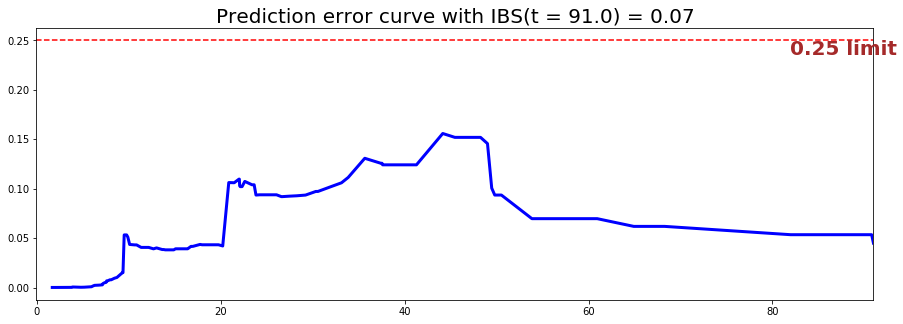

IBS: 0.07

 9 of kfold 10
Test C-index: 0.95


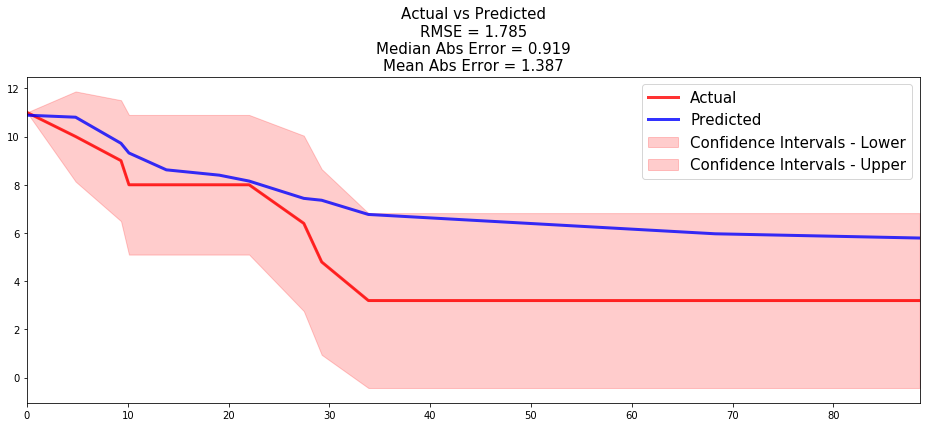

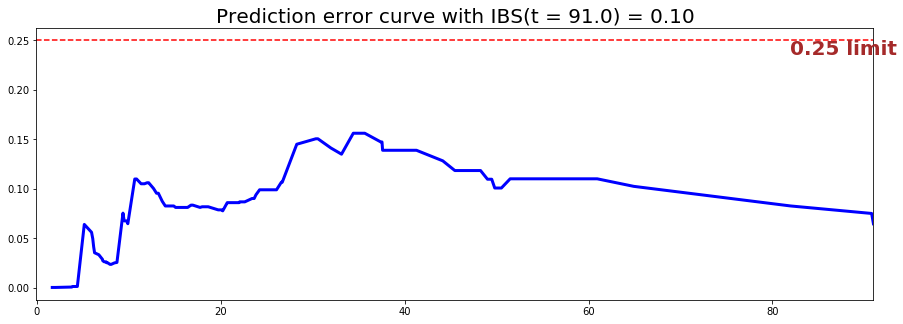

IBS: 0.10

 10 of kfold 10
Test C-index: 1.00


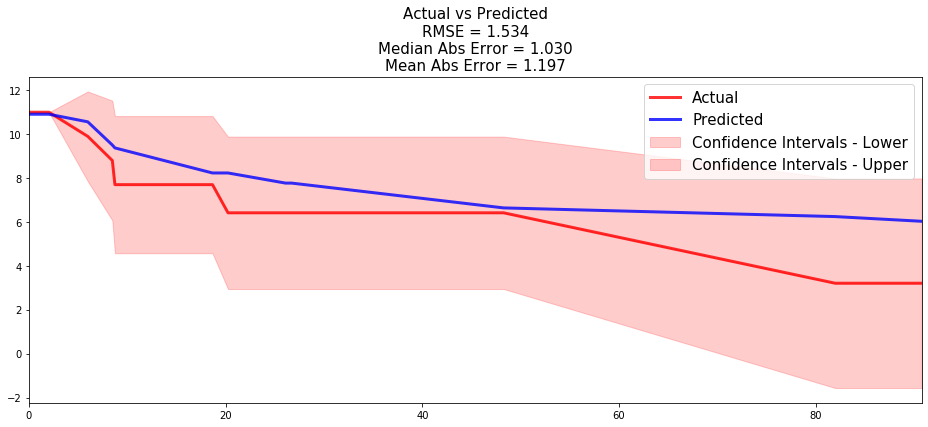

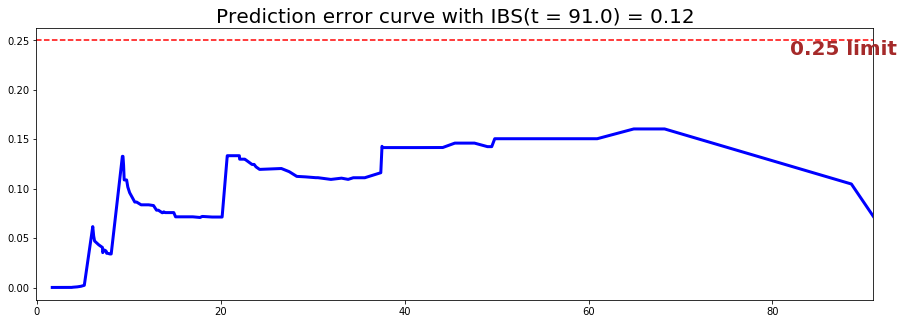

IBS: 0.12


In [18]:
# X = df_dev[colinear_features]
# T = df_dev['futime']
# E = df_dev['fustatus']from sklearn.model_selection import StratifiedKFold
# from pysurvival.models.survival_forest import RandomSurvivalForestModel
# from pysurvival.utils.metrics import concordance_index
# from pysurvival.utils.display import compare_to_actual
# from pysurvival.utils.display import integrated_brier_score
# from sklearn.model_selection import KFold
# i=1
# kf=KFold(n_splits=10, random_state=1, shuffle=True)
# for train_index, test_index in kf.split(X,E):
#     print('\n {} of kfold {}'.format(i,kf.n_splits)) 
#     X1_train, X1_test=X.loc[train_index], X.loc[test_index]
#     X_train, X_test=X1_train.dropna(), X1_test.dropna()
#     T_train, T_test=T.loc[train_index].dropna(), T.loc[test_index].dropna()
#     E_train, E_test=E.loc[train_index].dropna(), E.loc[test_index].dropna()

#     xx = RandomSurvivalForestModel(num_trees=300) 
#     xx.fit(X_train, T_train, E_train, max_features = 'sqrt', max_depth = 10,
#         min_node_size =2, importance_mode = 'normalized_permutation')
#     c_index_test = concordance_index(xx, X_test, T_test, E_test)
#     print('Test C-index: {:.2f}'.format(c_index_test))
# #     c_index_val = concordance_index(xx, X_valds, T_valds, E_valds)
# #     print('Test C-index: {:.2f}'.format(c_index))
#     results = compare_to_actual(xx, X_test, T_test, E_test, is_at_risk = True,  figure_size=(16, 6), 
#                                 metrics = ['rmse', 'mean', 'median'])
#     ibs = integrated_brier_score(xx, X_test, T_test, E_test, t_max=100, figure_size=(15,5))
#     print('IBS: {:.2f}'.format(ibs))
#     i=i+1
    
    